##<font color=lightgreen> Part B: Customer Churn Prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [2]:
# Load the dataset
customer_data = pd.read_csv('Customer_data.csv')



### <font color=lightyellow> Data Exploration and preprocessing

In [3]:
customer_data.shape

(7043, 21)

In [4]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
customer_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
#  Handling  missing values
# drop rows with missing values if there are few
if customer_data.isnull().sum().sum() > 0:
     customer_data=customer_data.dropna()




In [8]:
# Convert categorical variables to numerical
# List of categorical columns

cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod', 'Churn']



In [9]:
# Convert binary Yes/No columns to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for col in binary_cols:
    customer_data[col] = customer_data[col].map({'Yes': 1, 'No': 0})



In [10]:
# Convert other categorical variables using Label Encoding
label_encoder = LabelEncoder()
for col in cat_cols:
    if col not in binary_cols and customer_data[col].dtype == 'object':
        customer_data[col] = label_encoder.fit_transform(customer_data[col])



In [11]:
# Feature scaling for numerical variables
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
customer_data[num_cols] = scaler.fit_transform(customer_data[num_cols])



In [12]:
#  Dropping customerID as it's not useful for prediction
customer_data = customer_data.drop('customerID', axis=1)



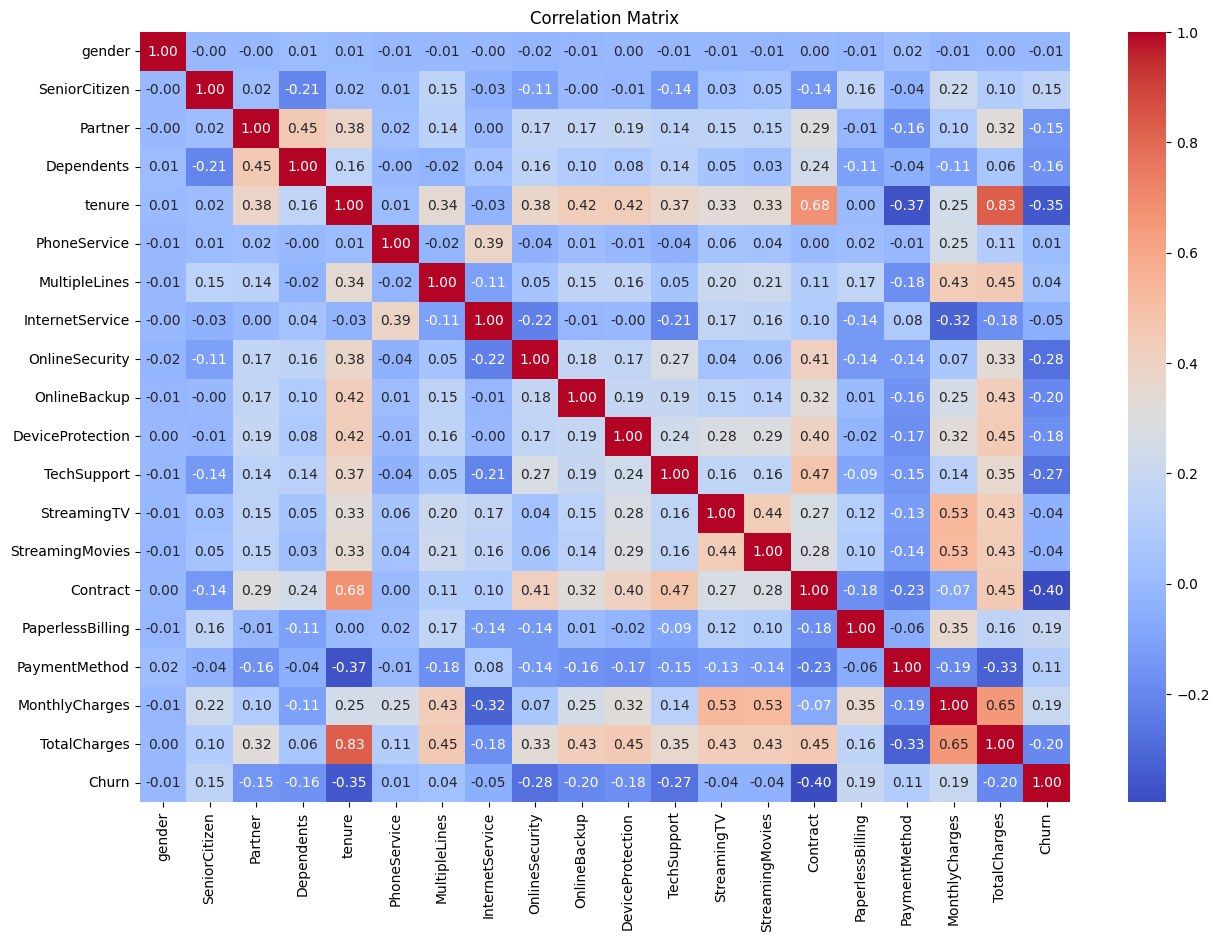

In [13]:
#  Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



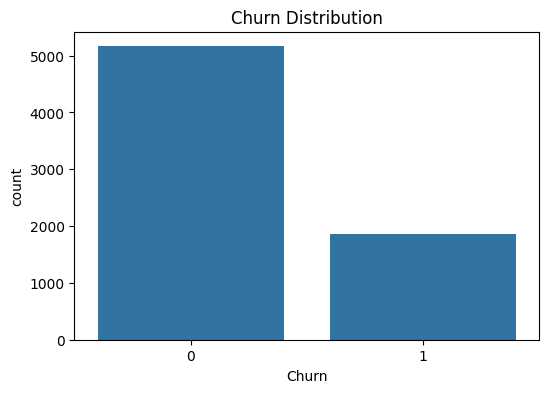

In [14]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=customer_data)
plt.title('Churn Distribution')
plt.show()

##<font color=lightyellow> Model Development

In [15]:
# Split data into train and test set
X = customer_data.drop('Churn', axis=1)
y = customer_data['Churn']


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
#Fitting data into the model to train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [18]:
# Making prediction by supplying test data
y_pred = rf_model.predict(X_test)

In [19]:
# Evaluating the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7896233120113717
Precision: 0.6433823529411765
Recall: 0.4679144385026738
F1 Score: 0.541795665634675


Interpretation :
1.Accuracy values hsows that 79% of total predictions were correct.
2. Precision of 64% indicates that out of all customers that model predicted as to be churners, about 64% did churn.
3. A recall value of 47% suggests that out of all customers who actually churned, the model identified only 47% of them. so the model is missing half of the actual churners
4. F1 score of 54% indicates moderate overall performance

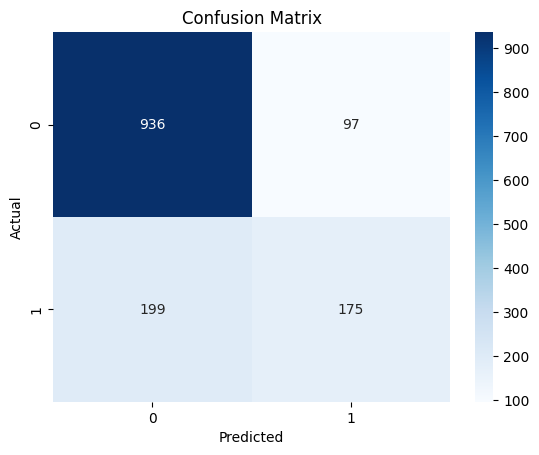

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## <Font color='lightgreen'> Insights

1. The correlation matrix shows a strong negative correlation between Contract and Churn. This implies that customers on month-to-month contracts are more likely to churn.
2. Total charges and tenure show a negative correlation with churn. This suggests that long-term customers with higher total charges are less likely to churn.
3. Contract, tech support, tenure onlinesecurity are negativeliy correlated with churn
4.the churn distribution graph clearly shows that the dataset is imbalanced.There are a very few churners(class 1) than non Churners(class 0).
5. The model's precision for Class 1 is 0.64 and recall is 0.47, indicating it correctly identifies 64% of predicted churners as actual churners, but only captures 47% of all actual churners.

##<font color=lightgreen>Recommendations

1. Offer incentives for custtomers to sign-up for long term contracts.
2. Encourage automatic payemnts or other more stable payement methods.
   by offering benefits.
3. Focus on improving the quality and reliability of the internet services.
4. Promote the adoption of value-added services like online security, tech support etc.
5.Regularly review pricing strategies to ensure competitiveness, especially for new customers.
6. For existing customers with rising monthly charges, proactively communicate value or offer loyalty discounts before they consider churning.
7. Identify customers who opt out of certain services (e.g., no phone service) and understand their reasons

## Video Link
https://drive.google.com/file/d/1yAOYqxBp2ulhqkqx2gRXMuMuqoWotmQx/view?usp=sharing